In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns 
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [2]:
data = pd.read_csv("diabetes(1).csv")
data.head(10)

PG   GL  BP  ST   IN   BMI    DPF  AG  DB
0   6  148  72  35    0  33.6  0.627  50   1
1   1   85  66  29    0  26.6  0.351  31   0
2   8  183  64   0    0  23.3  0.672  32   1
3   1   89  66  23   94  28.1  0.167  21   0
4   0  137  40  35  168  43.1  2.288  33   1
5   5  116  74   0    0  25.6  0.201  30   0
6   3   78  50  32   88  31.0  0.248  26   1
7  10  115   0   0    0  35.3  0.134  29   0
8   2  197  70  45  543  30.5  0.158  53   1
9   8  125  96   0    0   0.0  0.232  54   1

In [3]:
data.tail()

PG   GL  BP  ST   IN   BMI    DPF  AG  DB
763  10  101  76  48  180  32.9  0.171  63   0
764   2  122  70  27    0  36.8  0.340  27   0
765   5  121  72  23  112  26.2  0.245  30   0
766   1  126  60   0    0  30.1  0.349  47   1
767   1   93  70  31    0  30.4  0.315  23   0

In [4]:
#Shape of Data
data.shape

(768, 9)

In [5]:
data['DB'].value_counts()

0    500
1    268
Name: DB, dtype: int64

In [ ]:
#infromation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      768 non-null    int64  
 1   GL      768 non-null    int64  
 2   BP      768 non-null    int64  
 3   ST      768 non-null    int64  
 4   IN      768 non-null    int64  
 5   BMI     768 non-null    float64
 6   DPF     768 non-null    float64
 7   AG      768 non-null    int64  
 8   DB      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#lets describe the data
data.describe()

PG          GL          BP          ST          IN         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              DPF          AG          DB  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [ ]:
data.count()

PG     768
GL     768
BP     768
ST     768
IN     768
BMI    768
DPF    768
AG     768
DB     768
dtype: int64

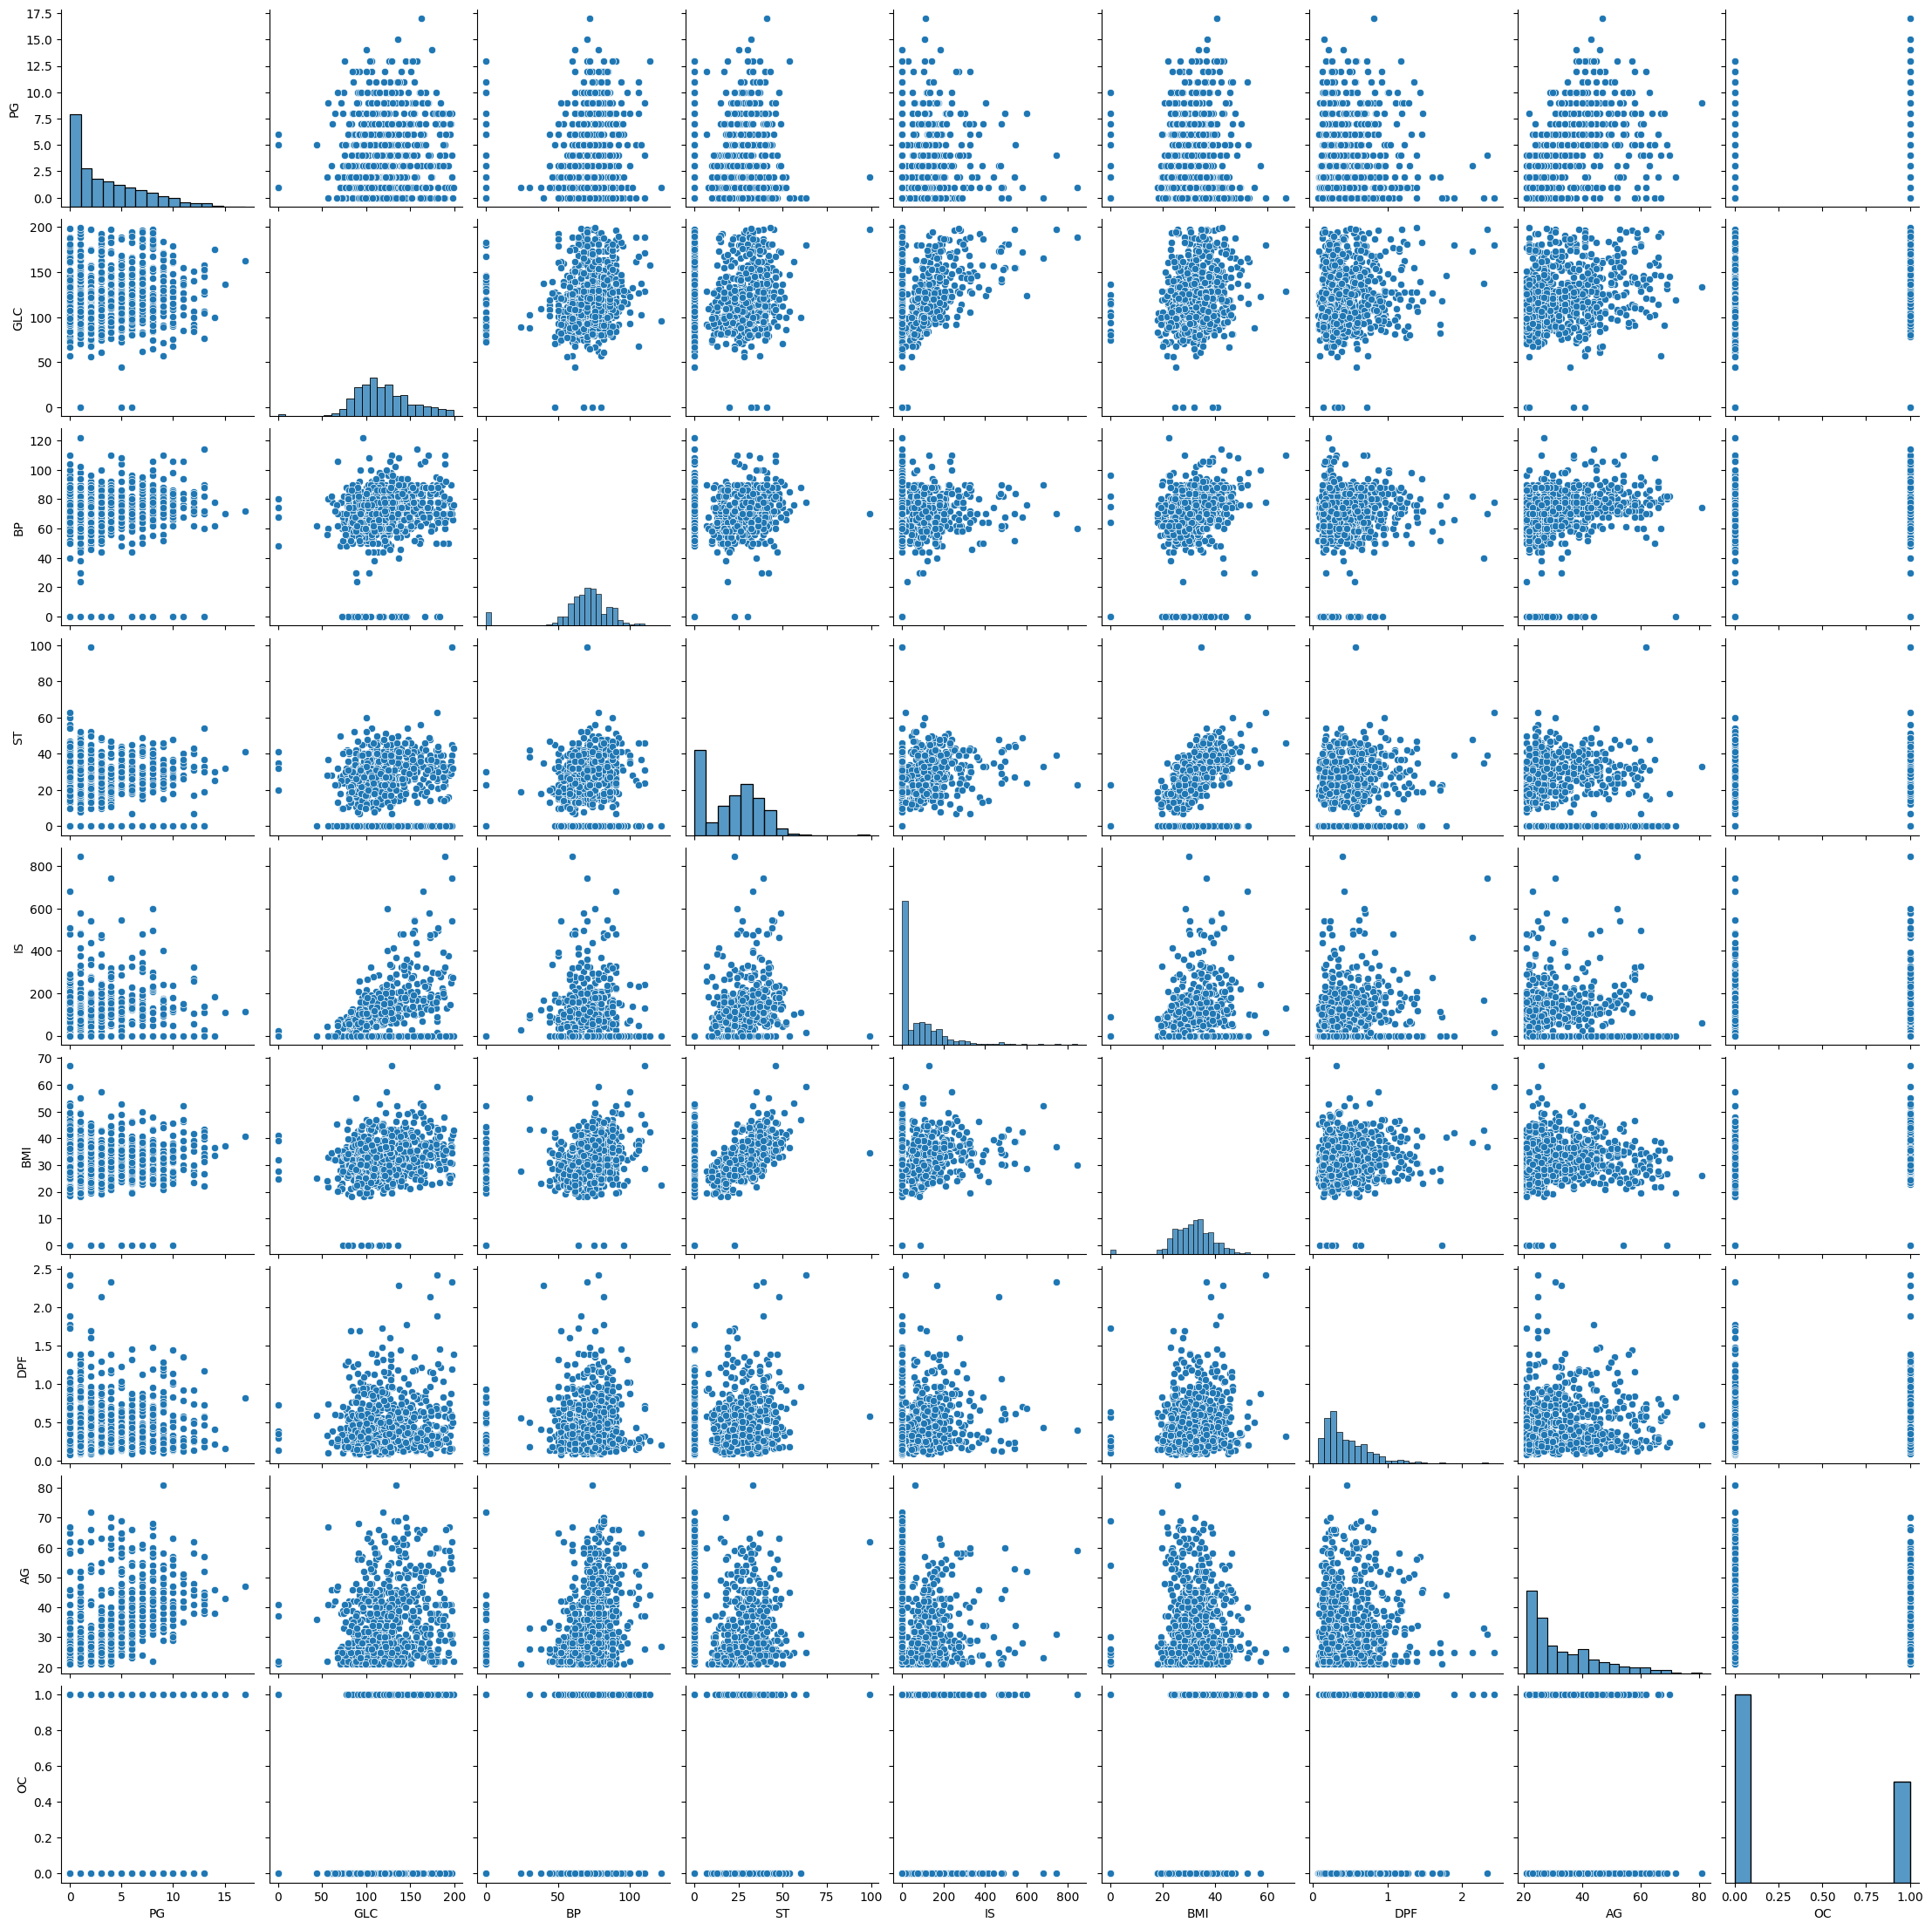

In [ ]:
sns.pairplot(data)

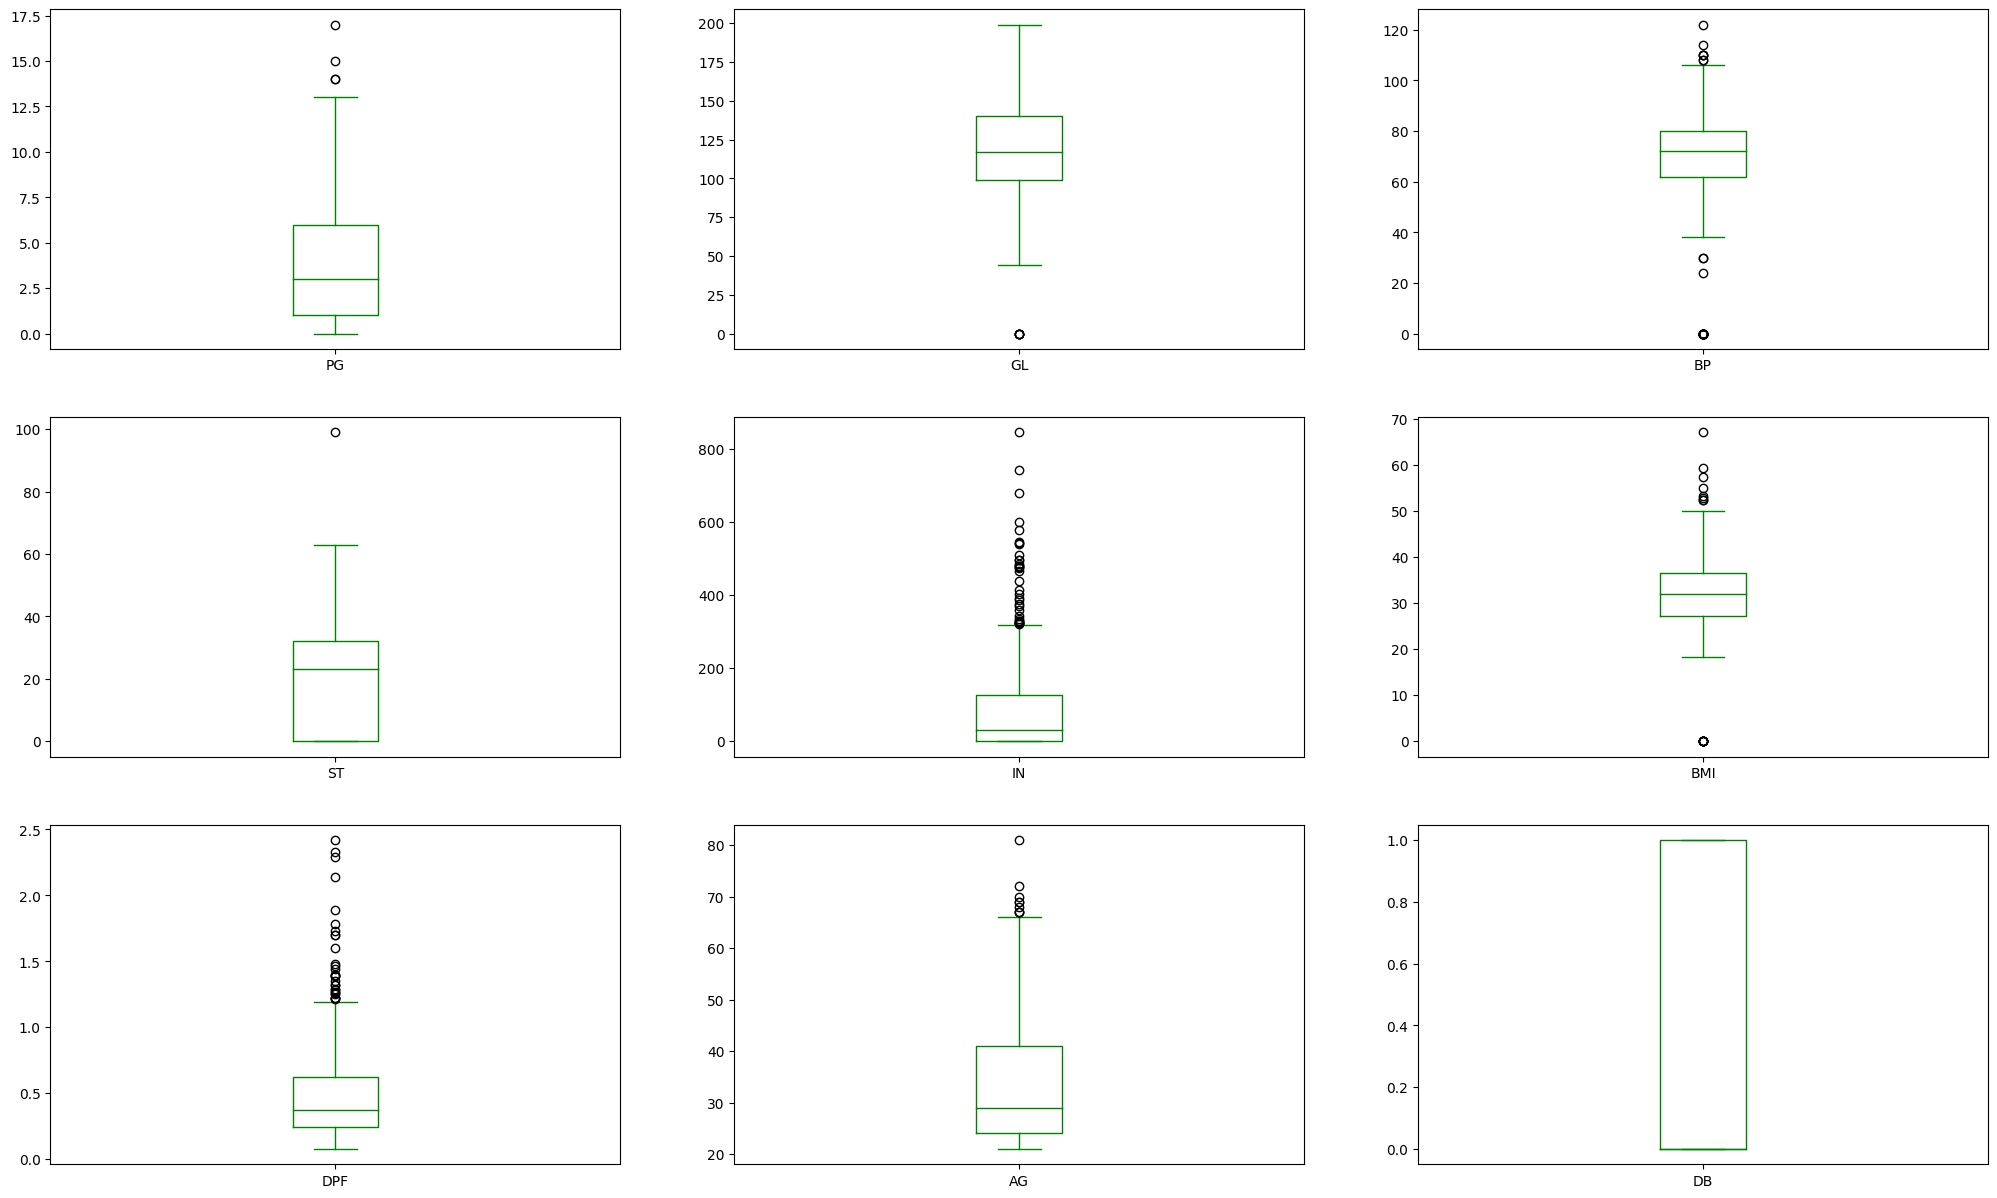

In [ ]:
data.plot(color = 'g', kind='box', figsize=(25, 15), subplots=True, layout=(3,3))
plt.show()

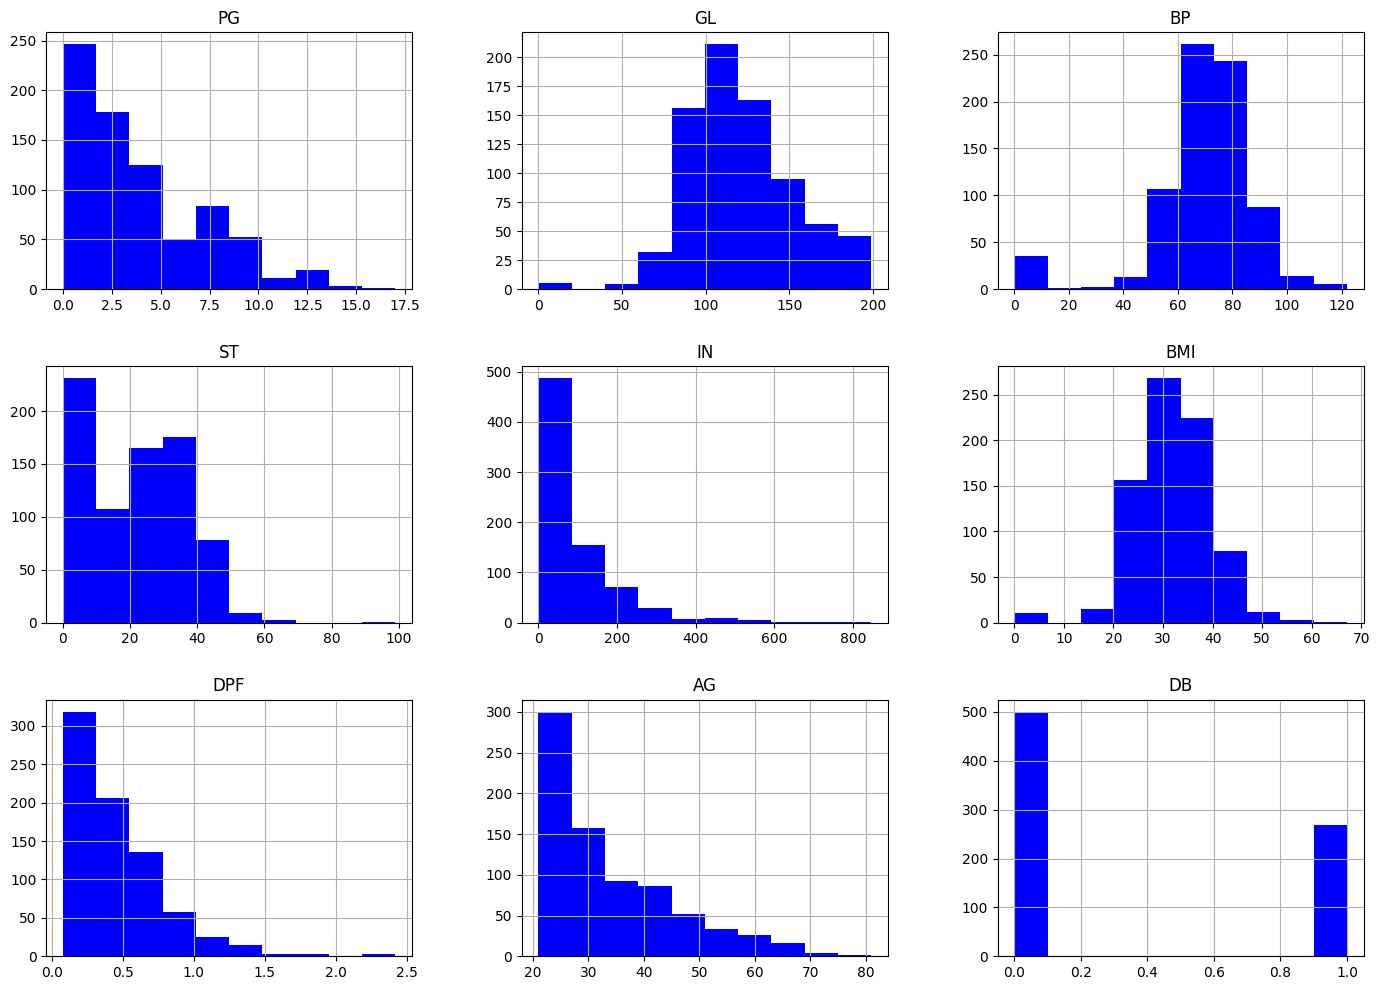

In [ ]:
#histogram
data.hist(color='Blue',bins=10,figsize=(17,12))
plt.show()

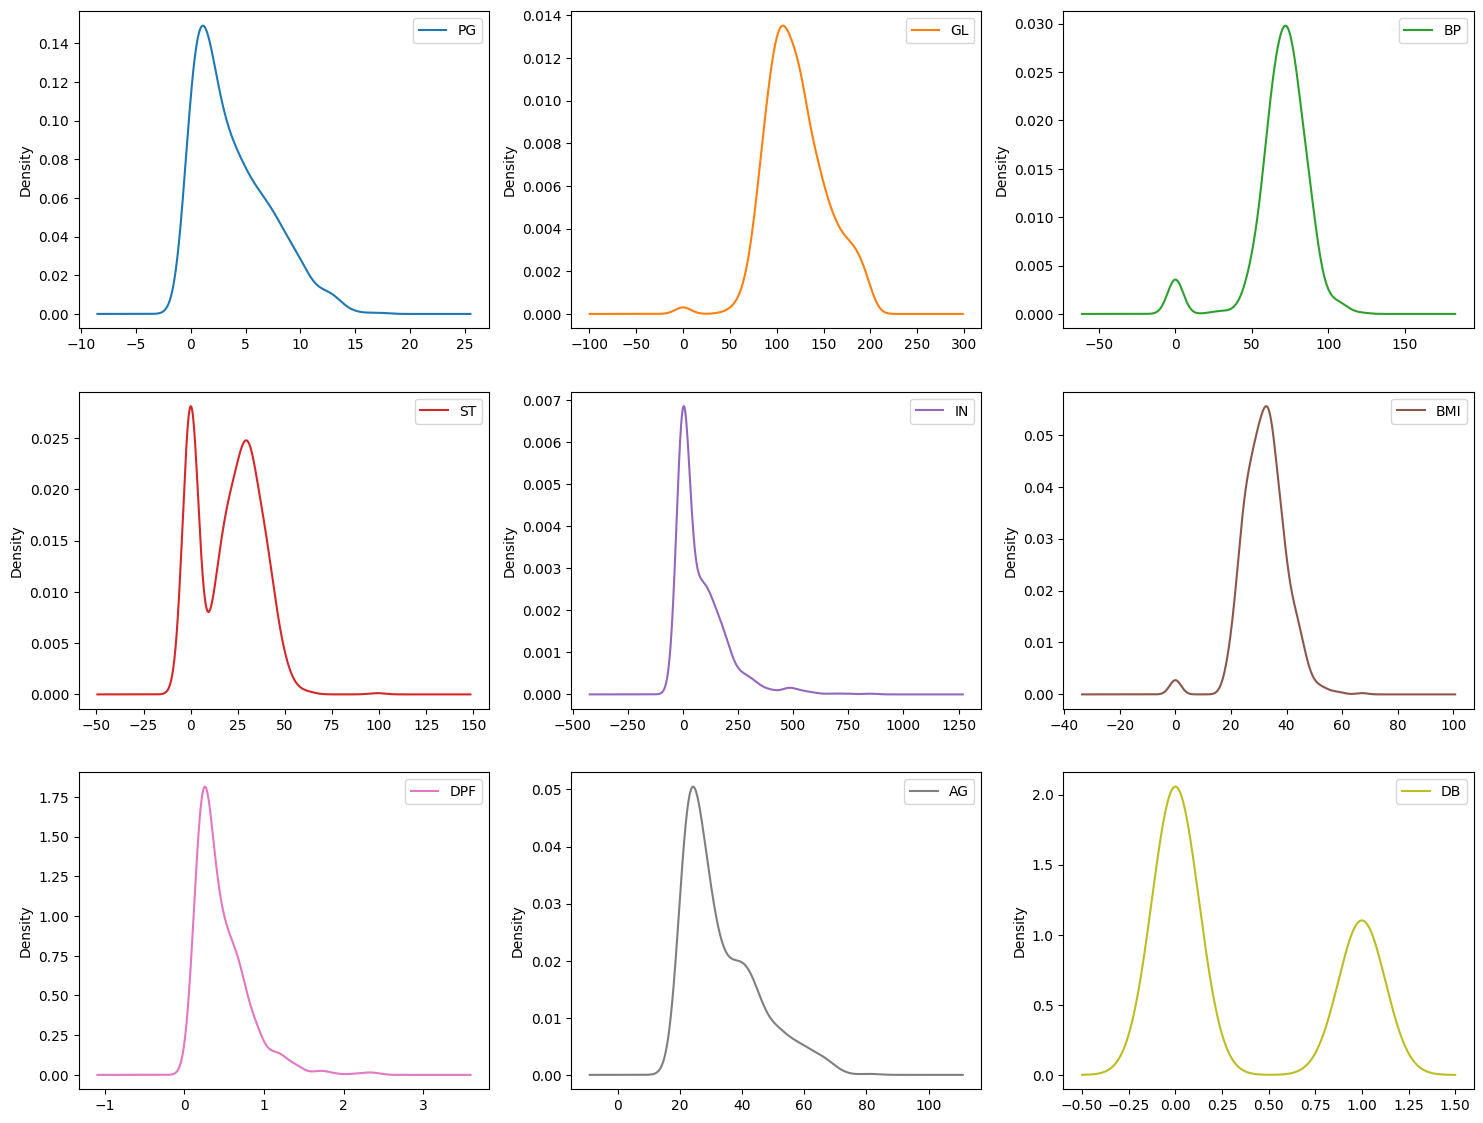

In [ ]:
#Boxplot of each column
data.plot( kind='density', figsize=(18,14), subplots=True, layout=(3,3),sharex=False)
plt.show()

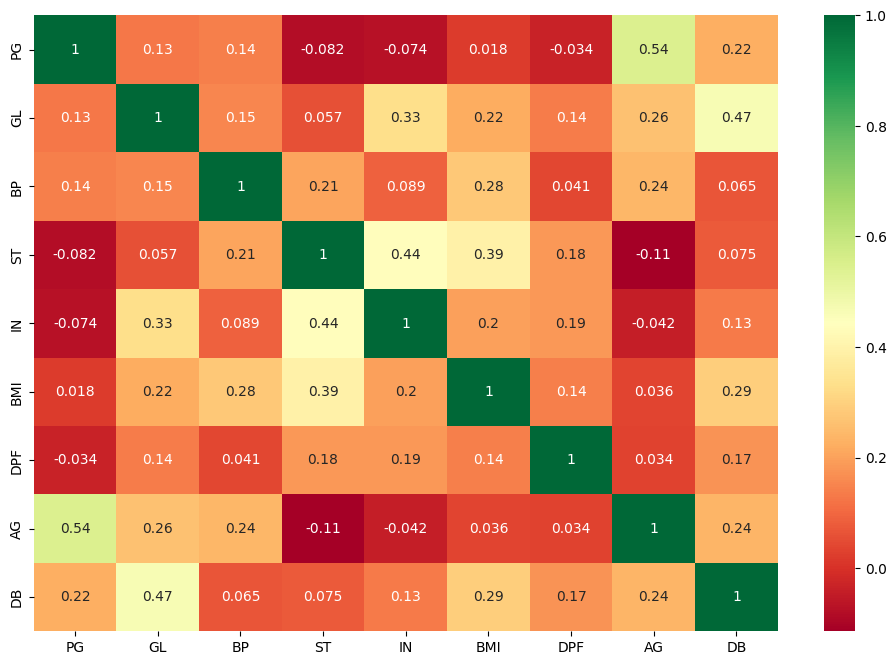

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#checking for the out layers with STD
print("Highest allowed",data['IN'].mean() + 3*data['IN'].std())
print("Lowest allowed",data['IN'].mean() - 3*data['IN'].std())

Highest allowed 425.5314862206812
Lowest allowed -265.9325278873478


In [ ]:
#dealing with out layer values 
data[(data['IN'] > 270) | (data['IN'] < -266)]


PG   GL  BP  ST          IN   BMI    DPF  AG  DB
8     2  197  70  45  373.077035  30.5  0.158  53   1
13    1  189  60  23  373.077035  30.1  0.398  59   1
53    8  176  90  34  300.000000  33.7  0.467  58   1
54    7  150  66  42  342.000000  34.7  0.718  42   0
56    7  187  68  39  304.000000  37.7  0.254  41   1
111   8  155  62  26  373.077035  34.0  0.543  46   1
139   5  105  72  29  325.000000  36.9  0.159  28   0
144   4  154  62  31  284.000000  32.8  0.237  23   0
153   1  153  82  42  373.077035  40.6  0.687  23   0
162   0  114  80  34  285.000000  44.2  0.167  27   0
186   8  181  68  36  373.077035  30.1  0.615  60   1
199   4  148  60  27  318.000000  30.9  0.150  29   1
206   8  196  76  29  280.000000  37.5  0.605  57   1
215  12  151  70  40  271.000000  41.8  0.742  38   1
220   0  177  60  29  373.077035  34.6  1.072  21   1
228   4  197  70  39  373.077035  36.7  2.329  31   0
231   6  134  80  37  370.000000  46.2  0.238  46   1
247   0  165  90  33  373.077035  52.3  0.427  23   0
248   9  124  70  33  373.077035  35.4  0.282  34   0
258   1  193  50  16  373.077035  25.9  0.655  24   0
279   2  108  62  10  278.000000  25.3  0.881  22   0
286   5  155  84  44  373.077035  38.7  0.619  34   0
296   2  146  70  38  360.000000  28.0  0.337  29   1
360   5  189  64  33  325.000000  31.2  0.583  29   1
364   4  147  74  25  293.000000  34.9  0.385  30   0
370   3  173  82  48  373.077035  38.4  2.137  25   1
375  12  140  82  43  325.000000  39.2  0.528  58   1
388   5  144  82  26  285.000000  32.0  0.452  58   1
392   1  131  64  14  373.077035  23.7  0.389  21   0
395   2  127  58  24  275.000000  27.7  1.600  25   0
409   1  172  68  49  373.077035  42.4  0.702  28   1
412   1  143  84  23  310.000000  42.4  1.076  22   0
415   3  173  84  33  373.077035  35.7  0.258  22   1
425   4  184  78  39  277.000000  37.0  0.264  31   1
480   3  158  70  30  328.000000  35.5  0.344  35   1
486   1  139  62  41  373.077035  40.7  0.536  21   0
519   6  129  90   7  326.000000  19.6  0.582  60   0
561   0  198  66  32  274.000000  41.3  0.502  28   1
574   1  143  86  30  330.000000  30.1  0.892  23   0
584   8  124  76  24  373.077035  28.7  0.687  52   1
606   1  181  78  42  293.000000  40.0  1.258  22   1
608   0  152  82  39  272.000000  41.5  0.270  27   0
612   7  168  88  42  321.000000  38.2  0.787  40   1
645   2  157  74  35  373.077035  39.4  0.134  30   0
655   2  155  52  27  373.077035  38.7  0.240  25   1
695   7  142  90  24  373.077035  30.4  0.128  43   1
707   2  127  46  21  335.000000  34.4  0.176  22   0
710   3  158  64  13  373.077035  31.2  0.295  24   0
713   0  134  58  20  291.000000  26.4  0.352  21   0
715   7  187  50  33  373.077035  33.9  0.826  34   1
753   0  181  88  44  373.077035  43.3  0.222  26   1

In [ ]:
new_df = data[(data['IN'] <270) & (data['IN'] >-266)]
new_df

PG   GL  BP  ST     IN   BMI    DPF  AG  DB
0     6  148  72  35    0.0  33.6  0.627  50   1
1     1   85  66  29    0.0  26.6  0.351  31   0
2     8  183  64   0    0.0  23.3  0.672  32   1
3     1   89  66  23   94.0  28.1  0.167  21   0
4     0  137  40  35  168.0  43.1  2.288  33   1
..   ..  ...  ..  ..    ...   ...    ...  ..  ..
763  10  101  76  48  180.0  32.9  0.171  63   0
764   2  122  70  27    0.0  36.8  0.340  27   0
765   5  121  72  23  112.0  26.2  0.245  30   0
766   1  126  60   0    0.0  30.1  0.349  47   1
767   1   93  70  31    0.0  30.4  0.315  23   0

[716 rows x 9 columns]

In [ ]:
#storing the values 
upper_limit = data['IN'].mean() + 3*data['IN'].std()
lower_limit = data['IN'].mean() - 3*data['IN'].std()

In [ ]:
data['IN'] = np.where(
    data['IN']>upper_limit,
    upper_limit,
    np.where(
        data['IN']<lower_limit,
        lower_limit,
        data['IN']
    )
)

<ipython-input-36-491b1d3f24ef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['IN'])
<ipython-input-36-491b1d3f24ef>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['IN'])


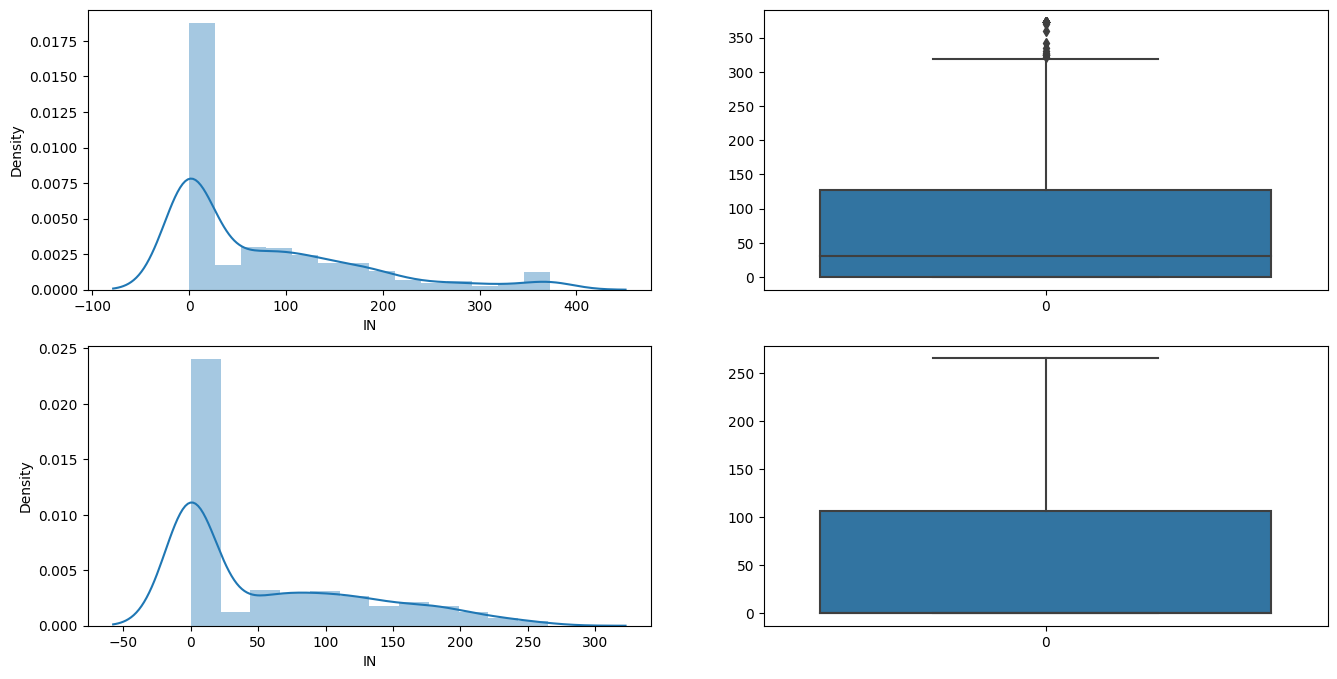

In [ ]:
#ploting the outlayer removing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['IN'])
plt.subplot(2,2,2)
sns.boxplot(data['IN'])
plt.subplot(2,2,3)
sns.distplot(new_df['IN'])
plt.subplot(2,2,4)
sns.boxplot(new_df['IN'])
plt.show()

In [ ]:
# creating a for to replace outlayers using boxplot method
num_var=(data)
for i in num_var:
    # taking quantiles
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1 # calculating IQR
    data[i] = np.where(data[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),data[i]) # removing outlayers
    data[i] = np.where(data[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),data[i]) # removing outlayers

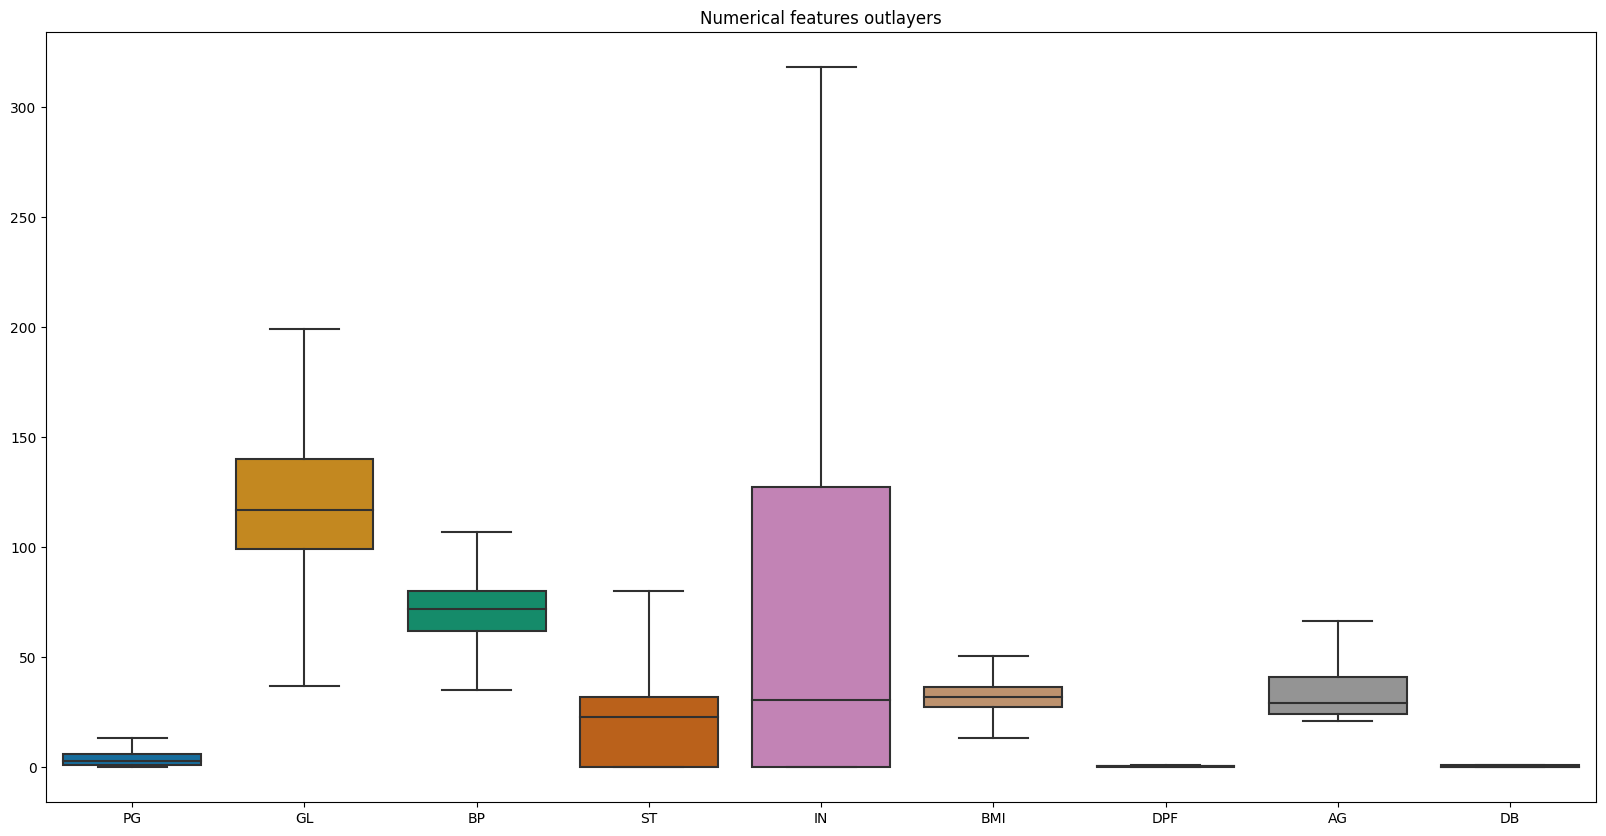

In [ ]:
# Plotting boxplots to numeric features
num_var = ['PG','GL','BP','ST','IN','BMI','DPF','AG','DB']


plt.figure(figsize=(20,10))
sns.boxplot(data=data[num_var], 
                 palette="colorblind")
plt.title('Numerical features outlayers');

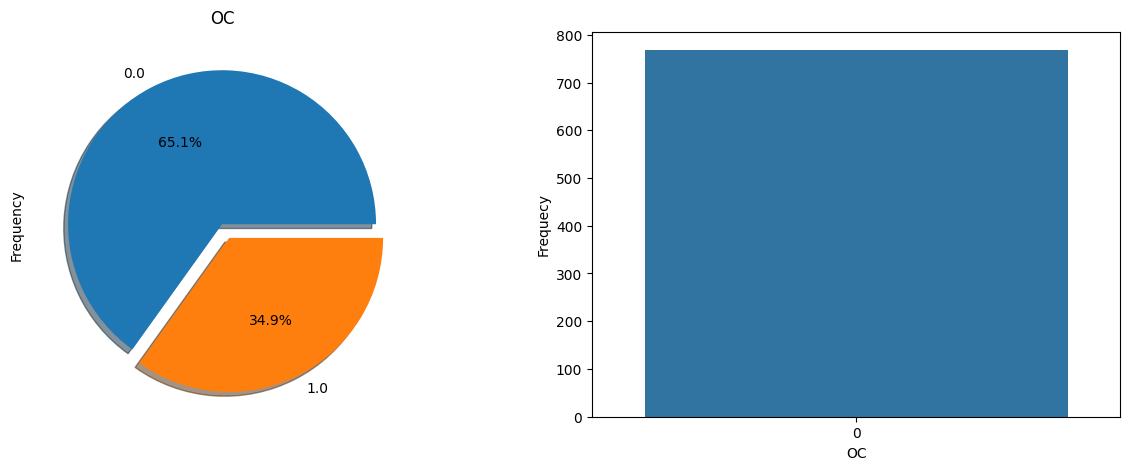

In [ ]:
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(data['OC'])
#plt.title("Frequency of Diabetes in Dataset")
plt.xlabel("OC")
plt.ylabel("Frequecy")

#Piechart show
data['OC'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('OC')
ax[0].set_ylabel('Frequency')
plt.show()

In [ ]:
data.columns

Index(['PG', 'GL', 'BP', 'ST', 'IN', 'BMI', 'DPF', 'AG', 'DB'], dtype='object')

In [ ]:
#reading data from pandas
col_names = ['PG', 'GL', 'BP', 'ST', 'IN', 'BMI', 'DPF', 'AG', 'DB']
df = pd.read_csv("diabetes(1).csv", header=1, names=col_names)

<Axes: >

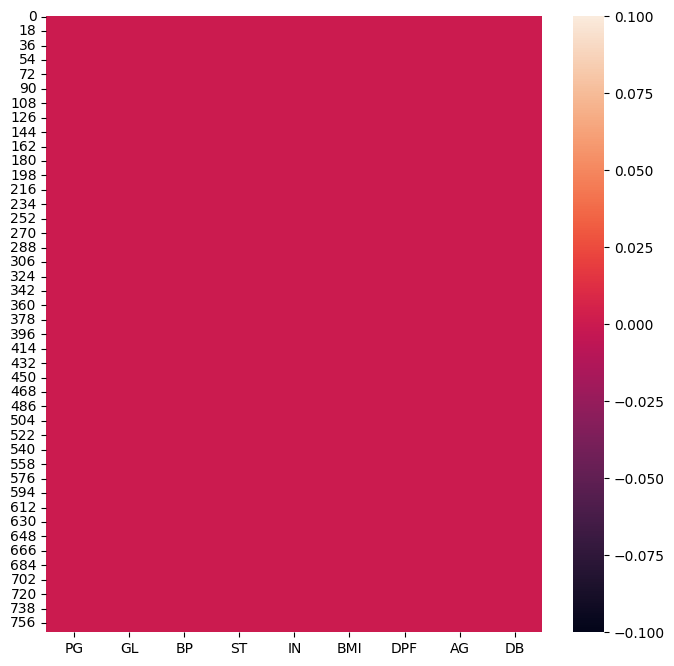

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

In [ ]:
data_boxcox = data.copy()
X = data_boxcox.drop(['DB'],axis=1)
Y = data_boxcox['DB']

In [ ]:
#To keep BoxCox data as it is to use the same for later.
data_bal = data_boxcox.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.DB==0]
df_minority = data_bal[data_bal.DB==1]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class
df_manjority_downsampled = resample(df_majority,replace=False,n_samples=150,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.DB.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=300,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.DB.value_counts())

Downsampled data:->
 1    268
0    150
Name: DB, dtype: int64
Upsampled data:->
 0    500
1    300
Name: DB, dtype: int64


Text(0.5, 0, 'DB')

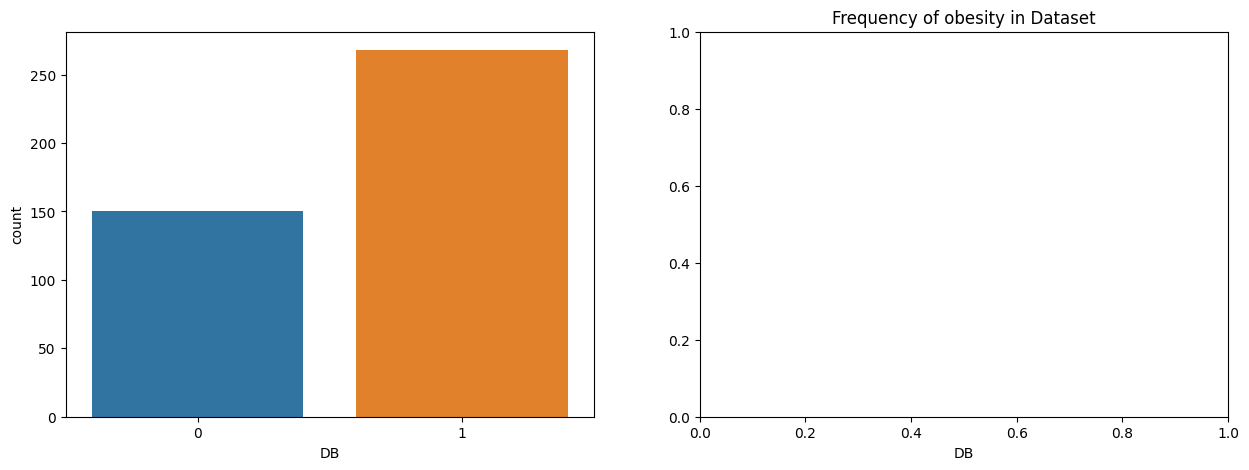

In [ ]:
#Plot the diabetic Values
# f,ax=plt.subplots(1,2,figsize=(15,5))
# sns.countplot(df_downsampled['Outcome'])
# plt.title("Frequency of Heart Disease in Dataset")
# plt.xlabel("Outcome")
# plt.ylabel("Frequecy")

# #Piechart show
# df_downsampled['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('Outcome')
# ax[0].set_ylabel('Frequency')
# plt.show()
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='DB', data=df_downsampled, ax=ax[0])
plt.title("Frequency of obesity in Dataset")
plt.xlabel("DB")

Text(0.5, 0, 'DB')

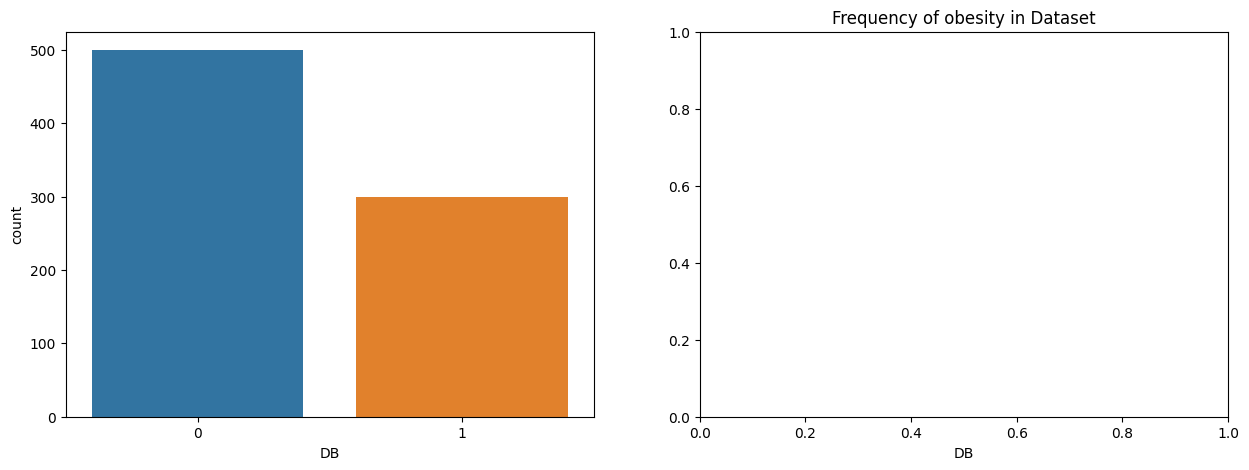

In [ ]:
#Plot the diabetic Values
# f,ax=plt.subplots(1,2,figsize=(15,5))
# sns.countplot(df_upsampled['Outcome'])
# plt.title("Frequency of Heart Disease in Dataset")
# plt.xlabel("Outcome")
# plt.ylabel("Frequecy")
# #Piechart show
# df_upsampled['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('Outcome')
# ax[0].set_ylabel('Frequency')
# plt.show()
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='DB', data=df_upsampled, ax=ax[0])
plt.title("Frequency of obesity in Dataset")
plt.xlabel("DB")

In [ ]:
#lets describe the data
df_upsampled.describe().T

count        mean        std     min    25%     50%        75%      max
PG   800.0    3.963750   3.381546   0.000   1.00    3.00    6.00000   13.500
GL   800.0  121.114531  30.882870  37.125  99.00  117.00  140.00000  199.000
BP   800.0   70.500000  14.061193  35.000  62.00   72.00   80.00000  107.000
ST   800.0   20.701250  15.575389   0.000   0.00   23.00   33.00000   60.000
IN   800.0   76.013281  92.713394   0.000   0.00   44.00  130.00000  318.125
BMI  800.0   32.076812   6.865989  13.350  27.40   32.05   36.12500   50.550
DPF  800.0    0.462776   0.288514   0.078   0.24    0.38    0.64625    1.200
AG   800.0   33.140625  11.390081  21.000  24.00   29.00   41.00000   66.500
DB   800.0    0.375000   0.484426   0.000   0.00    0.00    1.00000    1.000

In [ ]:
#lets describe the data
df_downsampled.describe().T

count        mean         std     min        25%       50%      75%  \
PG   418.0    4.287081    3.559885   0.000    1.00000    4.0000    7.000   
GL   418.0  129.969498   33.001640  37.125  105.00000  126.0000  155.000   
BP   418.0   71.784689   14.704493  35.000   64.00000   72.0000   80.000   
ST   418.0   20.672249   16.431684   0.000    0.00000   24.0000   33.000   
IN   418.0   81.081938  101.863372   0.000    0.00000    0.0000  145.750   
BMI  418.0   33.288278    7.084671  13.350   28.75000   32.9000   37.575   
DPF  418.0    0.498605    0.300495   0.085    0.25525    0.4215    0.686   
AG   418.0   34.991627   11.801132  21.000   25.00000   32.0000   42.750   
DB   418.0    0.641148    0.480238   0.000    0.00000    1.0000    1.000   

         max  
PG    13.500  
GL   199.000  
BP   107.000  
ST    80.000  
IN   318.125  
BMI   50.550  
DPF    1.200  
AG    66.500  
DB     1.000

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


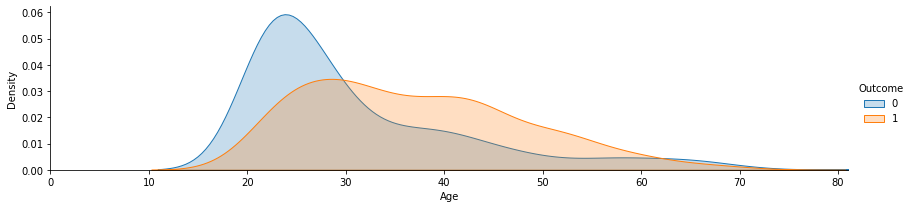

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


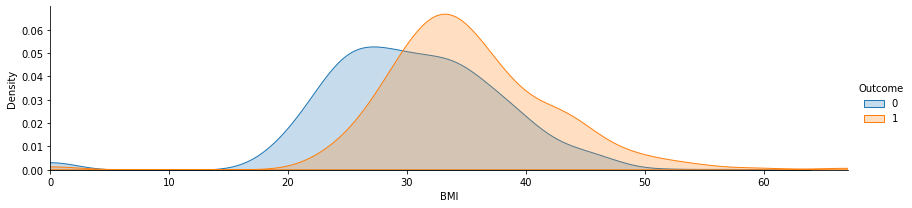

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'BMI', shade=True)
oldest = data['BMI'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


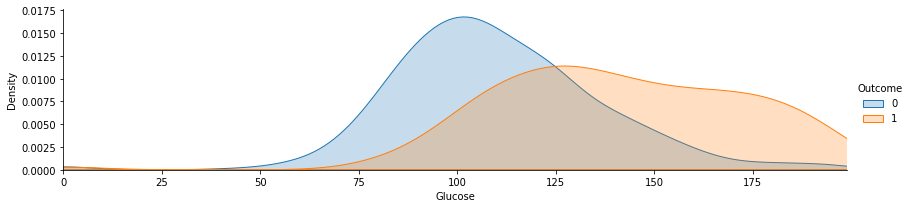

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Glucose', shade=True)
oldest = data['Glucose'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


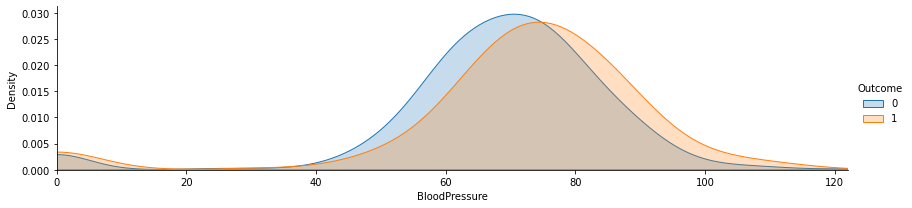

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'BloodPressure', shade=True)
oldest = data['BloodPressure'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


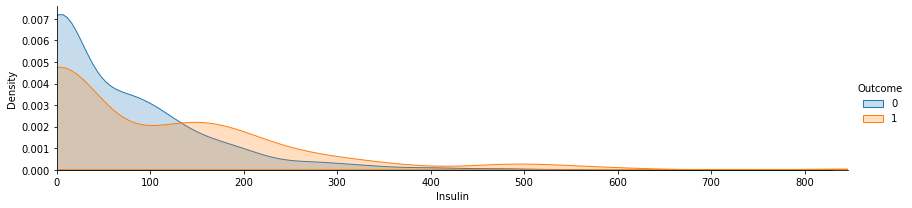

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Insulin', shade=True)
oldest = data['Insulin'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


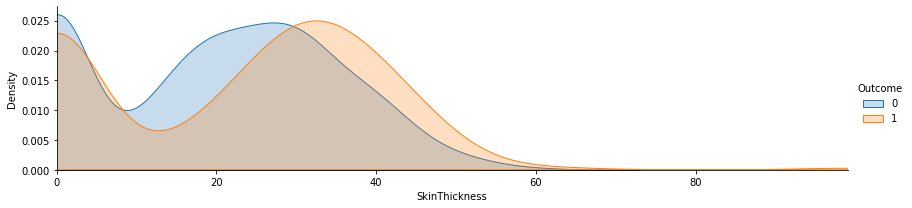

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'SkinThickness', shade=True)
oldest = data['SkinThickness'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

<Figure size 2160x2160 with 0 Axes>

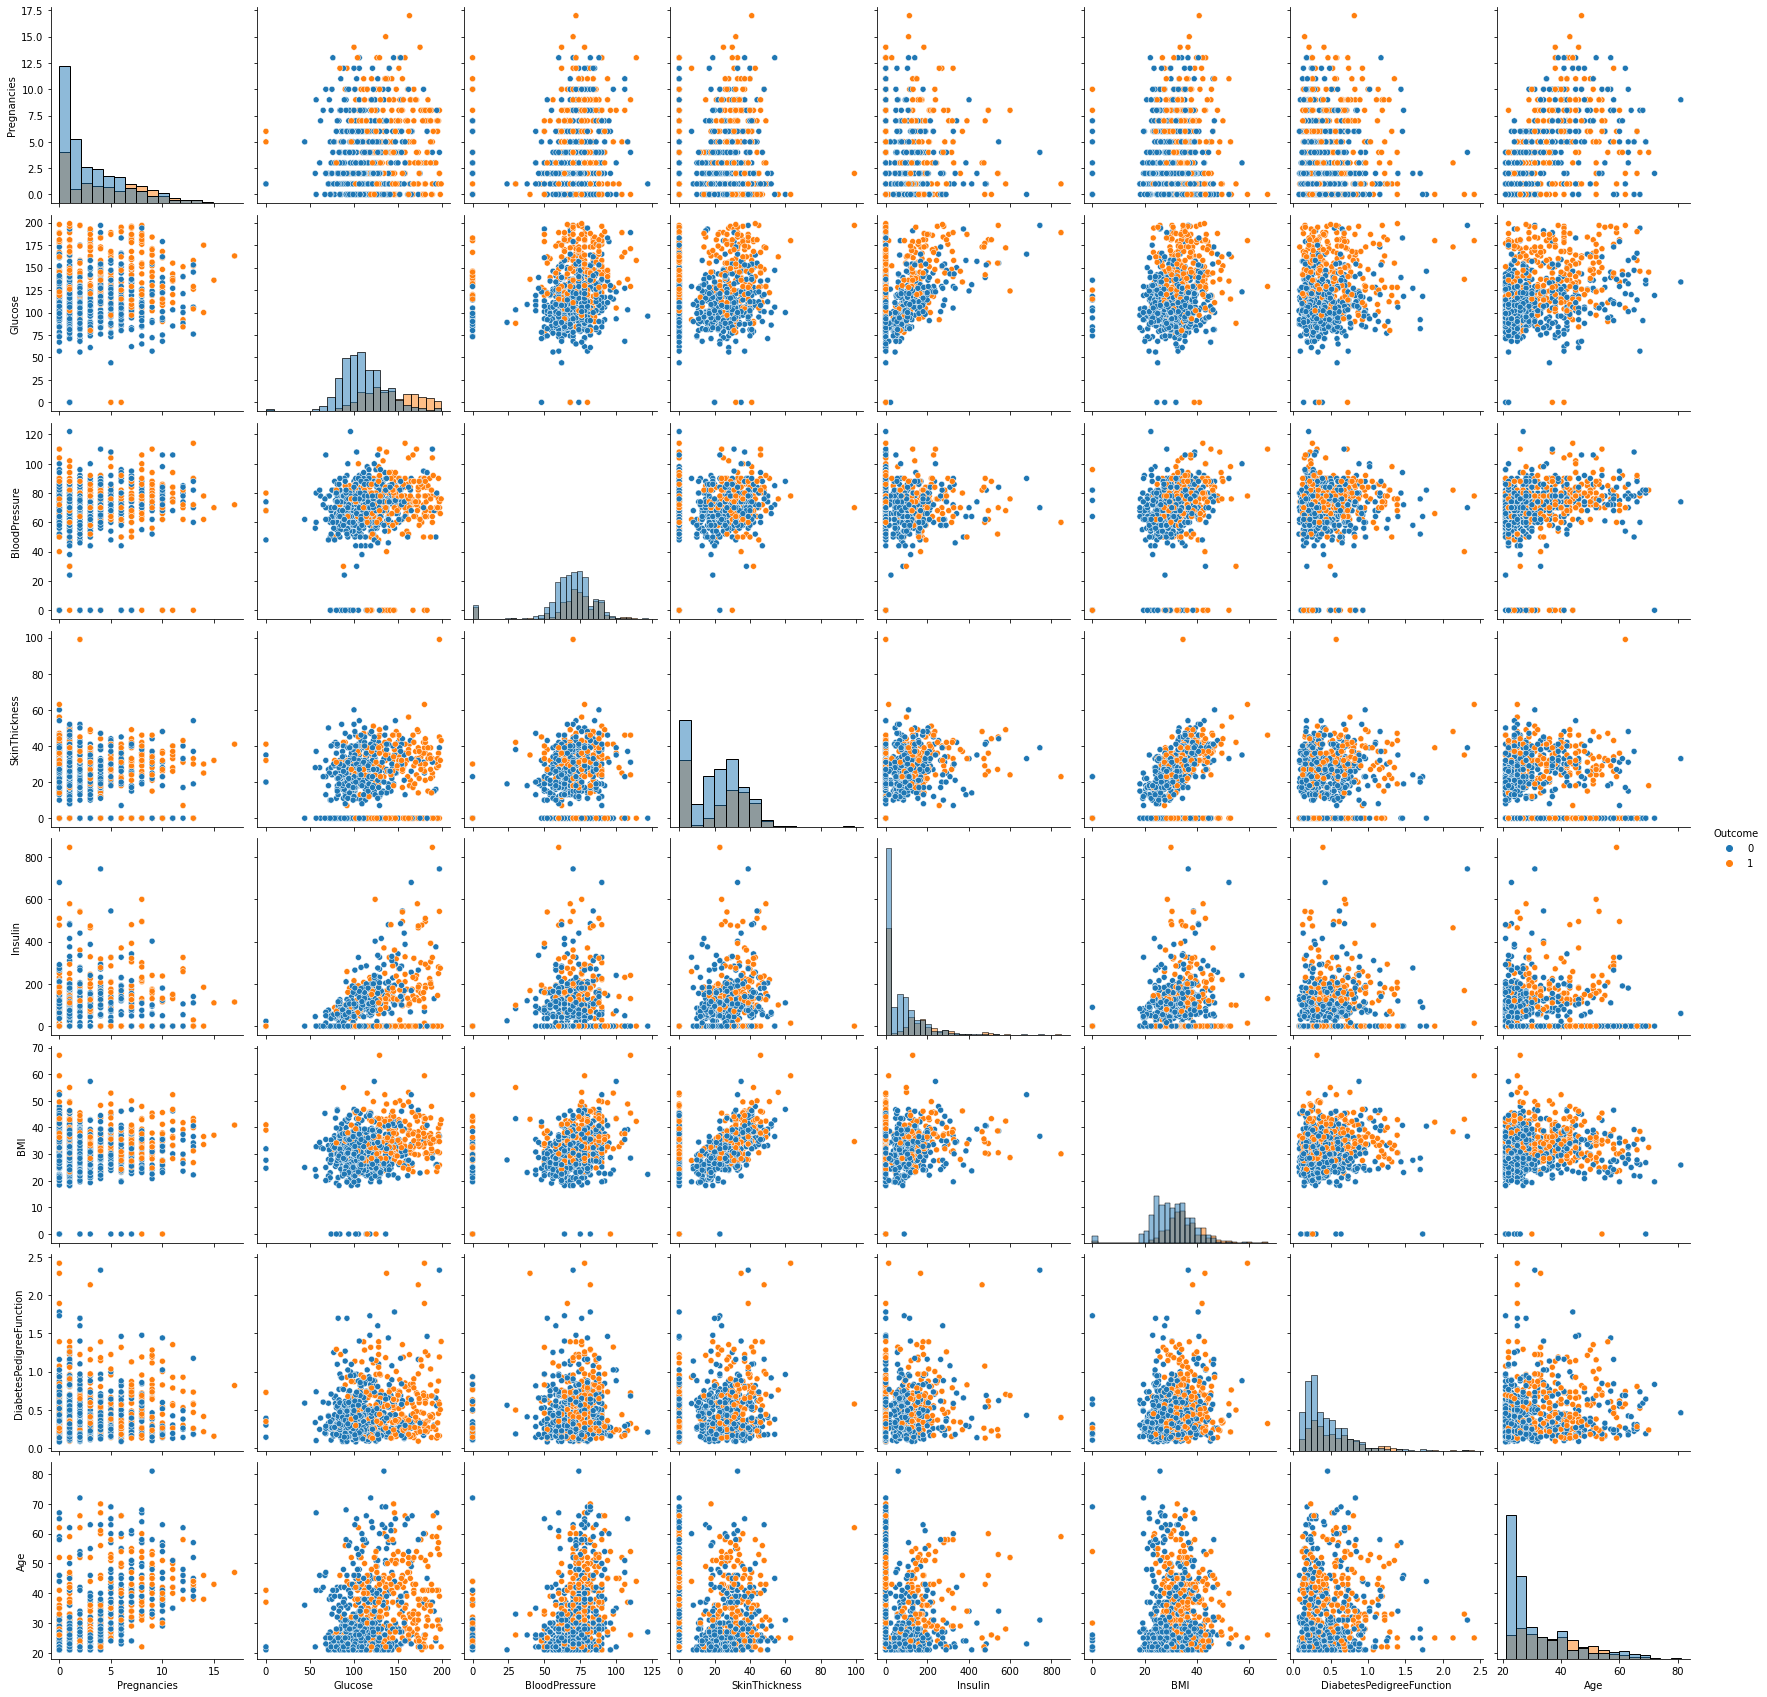

In [ ]:
plt.figure(figsize=(30, 30))
sns.pairplot(data, hue='Outcome', height=3, diag_kind='hist')

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        99
           1       0.87      0.85      0.86        61

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160

0.89375


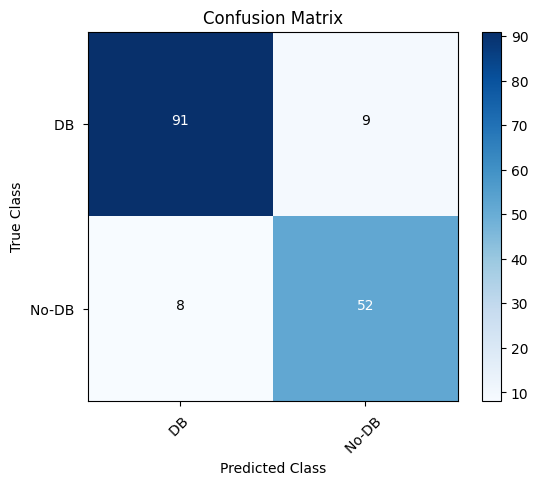

In [ ]:
from sklearn import  metrics 
X = df_upsampled.drop(['DB'],axis=1)
classes = ["DB ", "No-DB "]
Y = df_upsampled['DB']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier(learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#confusion_matrix(XGBR,X_test,y_test,labels=["Heart Disease","No-Heart Disease"],cm=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
featur_names = ['PG', 'GL', 'BP', 'ST', 'IN', 'BMI', 'DPF', 'AG', 'OC']
features = XGBR.feature_importances_
features

array([0.12342175, 0.12929842, 0.11219075, 0.09870323, 0.1951675 ,
       0.11702099, 0.10746135, 0.11673599], dtype=float32)

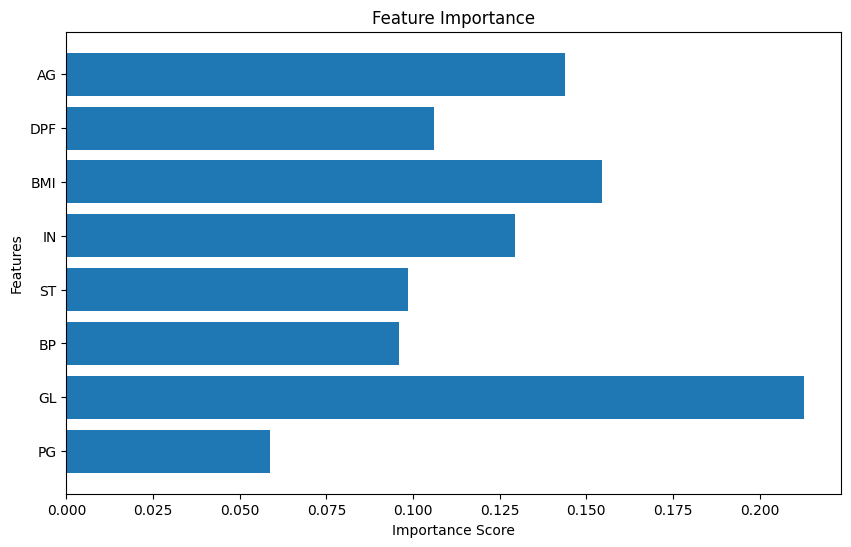

In [ ]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = xgbr.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
data.columns

Index(['PG', 'GL', 'BP', 'ST', 'IN', 'BMI', 'DPF', 'AG', 'DB'], dtype='object')

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [ ]:
X = np.array(df_upsampled[['PG', 'GL', 'BP', 'ST', 'IN', 'BMI', 'DPF', 'AG', 'DB']])
Y = np.array(df_upsampled.DB.T)
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("LightGBM",LGBMClassifier()))
models.append(("Catboost",CatBoostClassifier()))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        99
           1       0.87      0.85      0.86        61

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160

0.89375


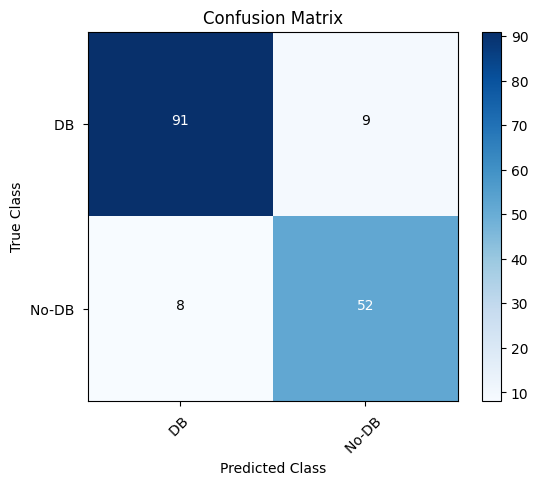

In [ ]:
#XGB
X = df_upsampled.drop(["DB"],axis=1)
Y = df_upsampled["DB"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model1 = XGBClassifier (learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

#(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
fpr_Model1, tpr_Model1, thresholds_Model1 = roc_curve(y_test, y_pred)
roc_auc_Model1 = auc (fpr_Model1, tpr_Model1)
precision_Model1, recall_Model1, th_Model1 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

#plot_confusion_matrix(Model1,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['PG', 'GL', 'BP', 'ST', 'IN', 'BMI', 'DPF', 'AG', 'DB']
features =Model1.feature_importances_
features

array([0.12342175, 0.12929842, 0.11219075, 0.09870323, 0.1951675 ,
       0.11702099, 0.10746135, 0.11673599], dtype=float32)

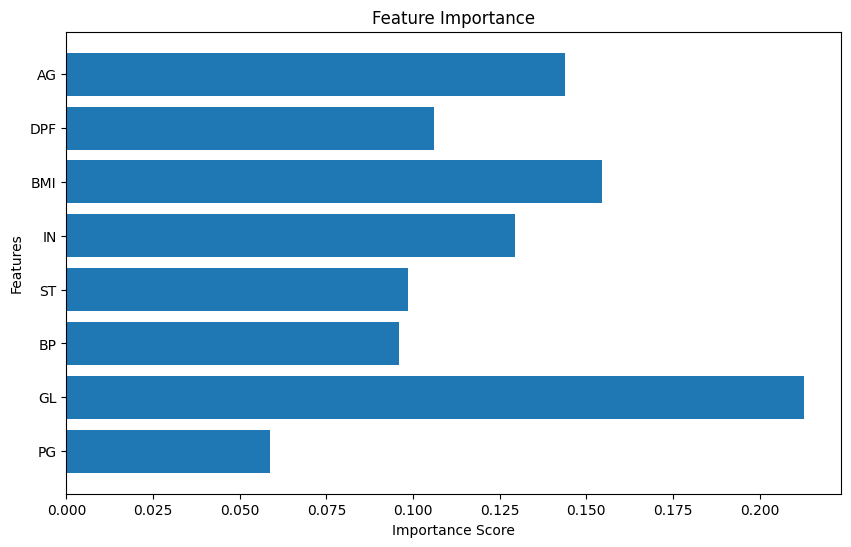

In [ ]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = xgbr.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        95
           1       0.90      0.83      0.86        65

    accuracy                           0.89       160
   macro avg       0.90      0.88      0.89       160
weighted avg       0.89      0.89      0.89       160

0.89375


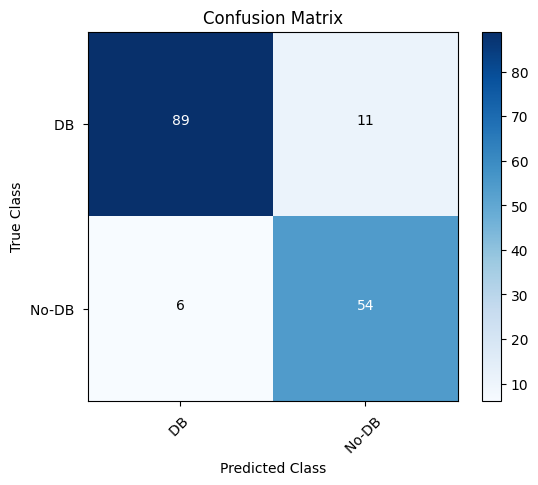

In [ ]:
#Ada Boost
X = df_upsampled.drop(["DB"],axis=1)
Y = df_upsampled["DB"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model2 = AdaBoostClassifier(n_estimators=20000,learning_rate=0.1,random_state=None)
#(random_state=0, learning_rate =0.1,n_estimators=100)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
fpr_Model2, tpr_Model2, thresholds_Model2 = roc_curve(y_test, y_pred)
roc_auc_Model2 = auc (fpr_Model2, tpr_Model2)
precision_Model2, recall_Model2, th_Model2 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model2,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['PG', 'GL', 'BP', 'ST', 'IN', 'BMI', 'DPF', 'AG', 'DB']
features =Model2.feature_importances_
features

array([0.01835, 0.17665, 0.04905, 0.0578 , 0.14765, 0.1473 , 0.3454 ,
       0.0578 ])

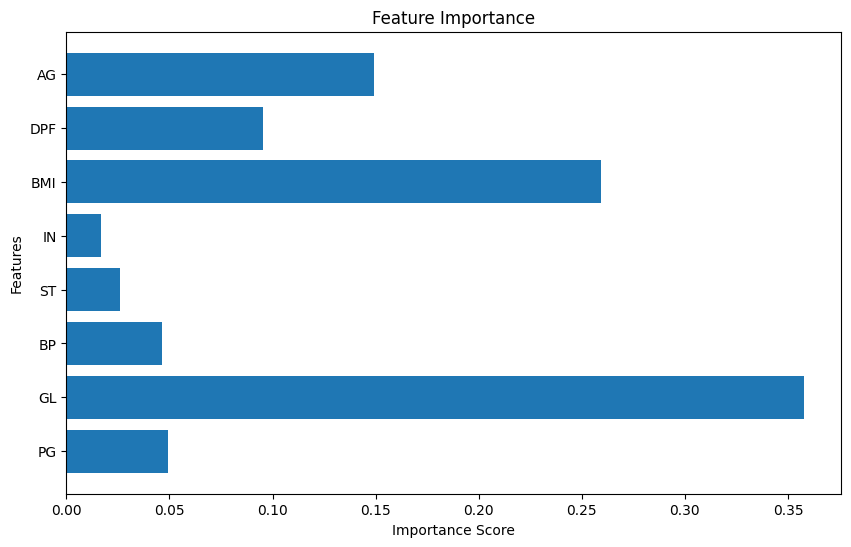

In [ ]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = ada.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
X_train.isnull().sum()

PG     0
GL     0
BP     0
ST     0
IN     0
BMI    0
DPF    0
AG     0
dtype: int64

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        97
           1       0.88      0.84      0.86        63

    accuracy                           0.89       160
   macro avg       0.89      0.88      0.89       160
weighted avg       0.89      0.89      0.89       160

0.89375


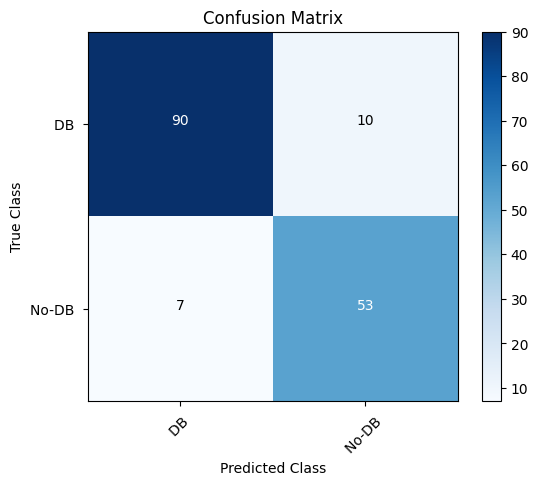

In [ ]:
# GB Boost
X = df_upsampled.drop(["DB"],axis=1)
Y = df_upsampled["DB"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model3 = GradientBoostingClassifier(random_state=45, learning_rate =0.1,n_estimators=10000,max_depth=10)
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
fpr_Model3, tpr_Model3, thresholds_Model3 = roc_curve(y_test, y_pred)
roc_auc_Model3 = auc (fpr_Model3, tpr_Model3)
precision_Model3, recall_Model3, th_Model3 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model3,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['PG', 'GL', 'BP', 'ST', 'IN', 'BMI', 'DPF', 'AG', 'DB']
features =Model3.feature_importances_
features

array([0.07827863, 0.3290424 , 0.07744741, 0.03206782, 0.05666334,
       0.18461612, 0.15343798, 0.0884463 ])

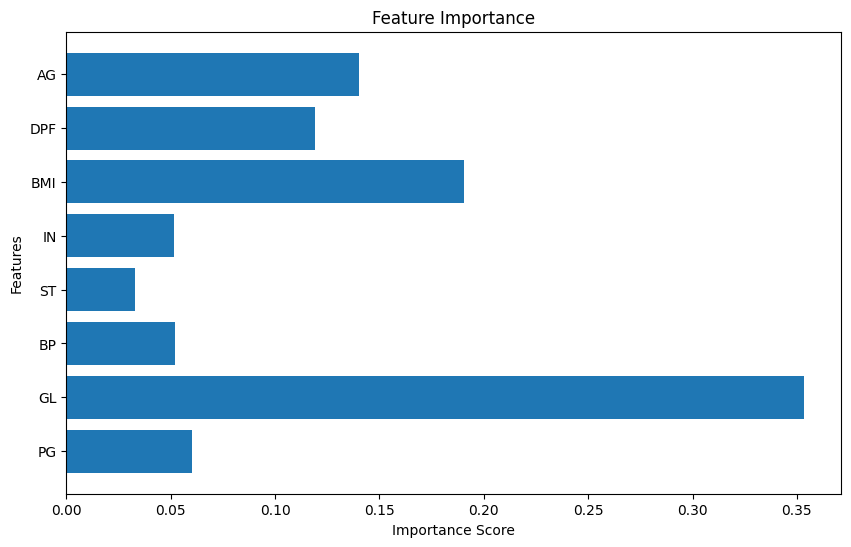

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = gbr.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.85      0.82      0.84        62

    accuracy                           0.88       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.87      0.88      0.87       160

0.875


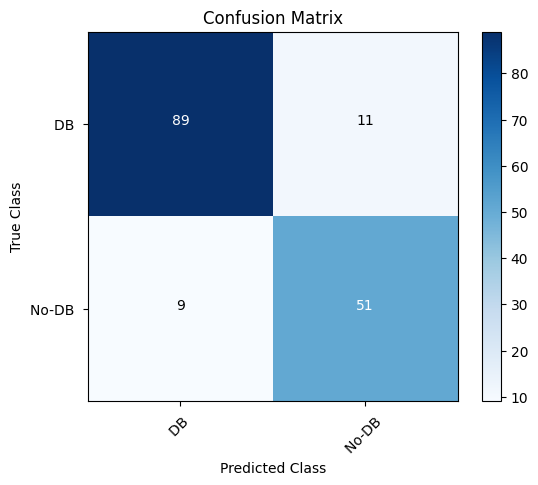

In [ ]:
#LightGBM
X = df_upsampled.drop(["DB"],axis=1)
Y = df_upsampled["DB"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model4 = LGBMClassifier(random_state=45, n_estimators= 10000, max_depth=8)
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
fpr_Model4, tpr_Model4, thresholds_Model4 = roc_curve(y_test, y_pred)
roc_auc_Model4 = auc (fpr_Model4, tpr_Model4)
precision_Model4, recall_Model4, th_Model4 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model4,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['PG', 'GL', 'BP', 'ST', 'IN', 'BMI', 'DPF', 'AG', 'DB']
features =Model4.feature_importances_
features

array([1285, 4746, 2144, 2965, 3015, 3963, 6952, 2842], dtype=int32)

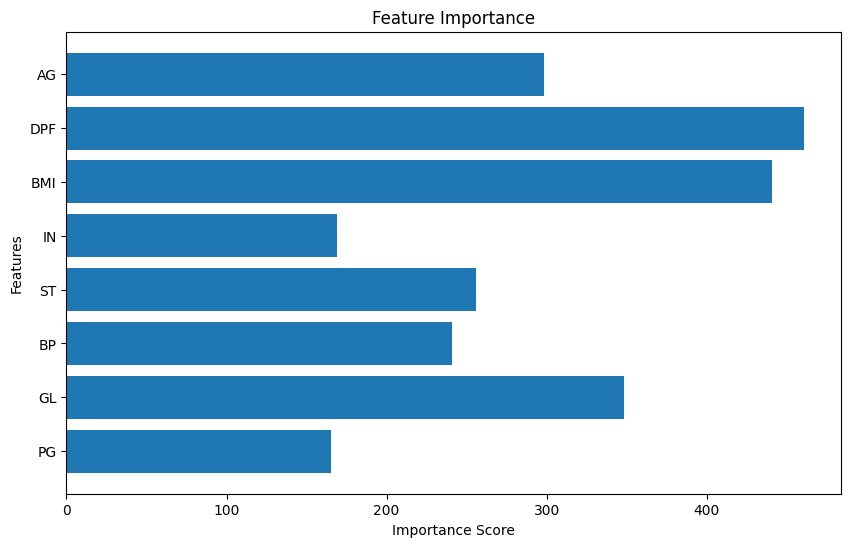

In [ ]:
import lightgbm as lgb
lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = lgb_reg.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


Learning rate set to 0.008515
0:	learn: 0.6879244	total: 49.3ms	remaining: 49.2s
1:	learn: 0.6842111	total: 51.7ms	remaining: 25.8s
2:	learn: 0.6789181	total: 53.9ms	remaining: 17.9s
3:	learn: 0.6746849	total: 56.2ms	remaining: 14s
4:	learn: 0.6688339	total: 58.4ms	remaining: 11.6s
5:	learn: 0.6645786	total: 60.9ms	remaining: 10.1s
6:	learn: 0.6604362	total: 63.1ms	remaining: 8.95s
7:	learn: 0.6562276	total: 65.3ms	remaining: 8.1s
8:	learn: 0.6517947	total: 67.5ms	remaining: 7.43s
9:	learn: 0.6482802	total: 69.7ms	remaining: 6.9s
10:	learn: 0.6437025	total: 72.2ms	remaining: 6.49s
11:	learn: 0.6397809	total: 74.3ms	remaining: 6.12s
12:	learn: 0.6353467	total: 76.8ms	remaining: 5.83s
13:	learn: 0.6323282	total: 79.2ms	remaining: 5.58s
14:	learn: 0.6279733	total: 81.4ms	remaining: 5.34s
15:	learn: 0.6245810	total: 83.7ms	remaining: 5.15s
16:	learn: 0.6214558	total: 85.9ms	remaining: 4.97s
17:	learn: 0.6185901	total: 87.8ms	remaining: 4.79s
18:	learn: 0.6148297	total: 90ms	remaining: 4.65

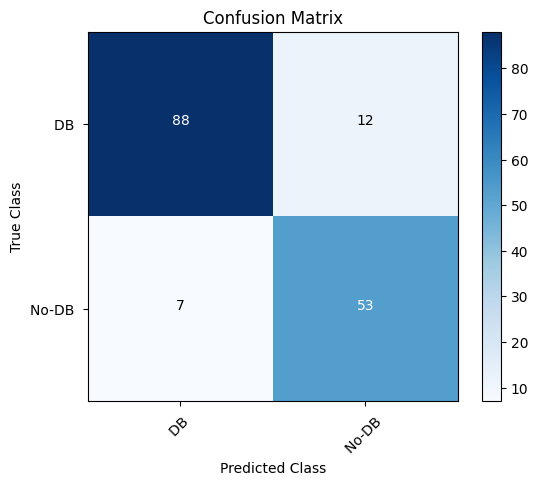

In [ ]:
#CAT Boost
X = df_upsampled.drop(["DB"],axis=1)
Y = df_upsampled["DB"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model5 = CatBoostClassifier(random_state=45, n_estimators=1000, max_depth=7)
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
fpr_Model5, tpr_Model5, thresholds_Model5 = roc_curve(y_test, y_pred)
roc_auc_Model5 = auc (fpr_Model5, tpr_Model5)
precision_Model5, recall_Model5, th_Model5 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model5,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['PG', 'GL', 'BP', 'ST', 'IN', 'BMI', 'DPF', 'AG', 'DB']
features =Model5.feature_importances_
features

array([ 9.83647758, 20.2551581 ,  8.44114551,  9.10221411,  7.70938299,
       17.75014069, 12.02362051, 14.88186051])

Learning rate set to 0.038155
0:	learn: 0.4783882	total: 1.55ms	remaining: 1.55s
1:	learn: 0.4740828	total: 5.37ms	remaining: 2.68s
2:	learn: 0.4693462	total: 8.77ms	remaining: 2.91s
3:	learn: 0.4639809	total: 12ms	remaining: 2.99s
4:	learn: 0.4591960	total: 15.3ms	remaining: 3.04s
5:	learn: 0.4556539	total: 18.6ms	remaining: 3.07s
6:	learn: 0.4519192	total: 22.2ms	remaining: 3.14s
7:	learn: 0.4481854	total: 24ms	remaining: 2.98s
8:	learn: 0.4441464	total: 27.8ms	remaining: 3.06s
9:	learn: 0.4405771	total: 31ms	remaining: 3.07s
10:	learn: 0.4368648	total: 42.8ms	remaining: 3.85s
11:	learn: 0.4332818	total: 53.1ms	remaining: 4.37s
12:	learn: 0.4298316	total: 55.5ms	remaining: 4.21s
13:	learn: 0.4269564	total: 58.3ms	remaining: 4.11s
14:	learn: 0.4242958	total: 60ms	remaining: 3.94s
15:	learn: 0.4214029	total: 61.1ms	remaining: 3.75s
16:	learn: 0.4187400	total: 62.1ms	remaining: 3.59s
17:	learn: 0.4165977	total: 65.1ms	remaining: 3.55s
18:	learn: 0.4138797	total: 67ms	remaining: 3.46s
19

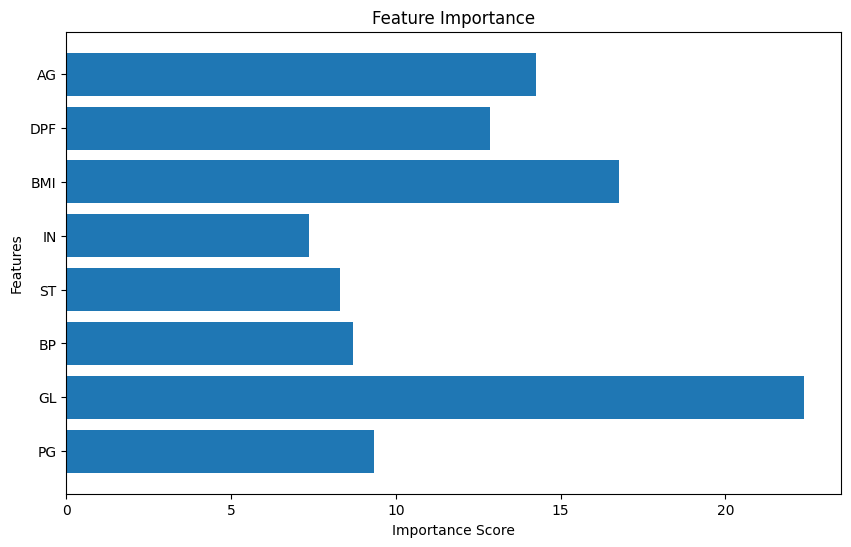

In [ ]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = catboost.get_feature_importance()
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [ ]:
X = data.drop(["OC"],axis=1)
Y = data["OC"]

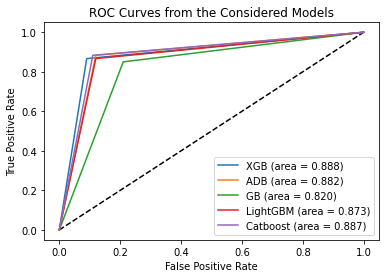

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Model1, tpr_Model1, label='XGB (area = %0.3f)' % roc_auc_Model1)
plt.plot(fpr_Model2, tpr_Model2, label='ADB (area = %0.3f)' % roc_auc_Model2)
plt.plot(fpr_Model3, tpr_Model3, label='GB (area = %0.3f)' % roc_auc_Model3)
plt.plot(fpr_Model4, tpr_Model4, label='LightGBM (area = %0.3f)' % roc_auc_Model4)
plt.plot(fpr_Model5, tpr_Model5, label='Catboost (area = %0.3f)' % roc_auc_Model5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves from the Considered Models')
plt.legend(loc='best')
plt.show()


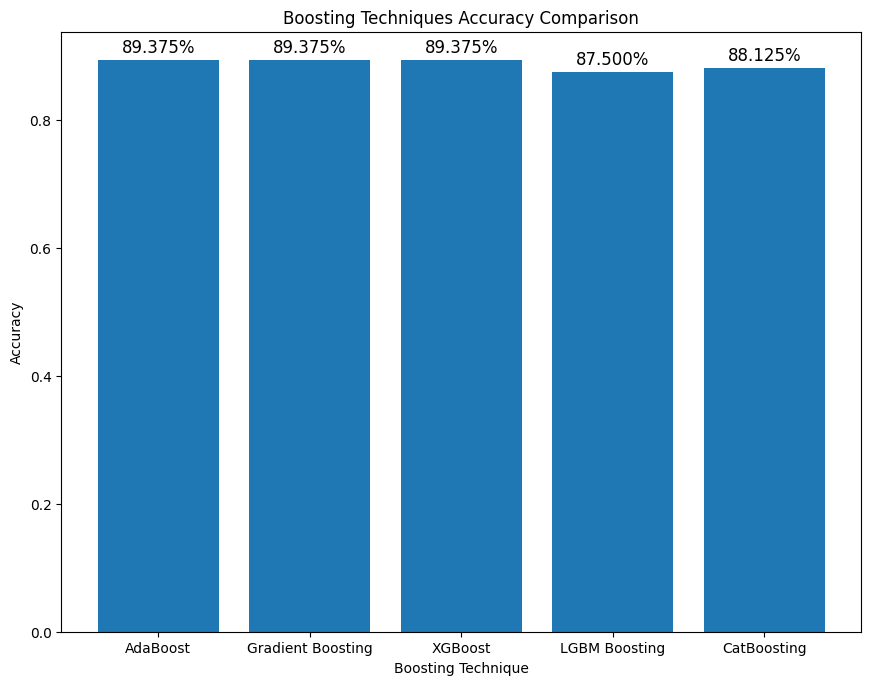

In [ ]:
import matplotlib.pyplot as plt

# Sample accuracy data
adaboost_accuracy = 0.89375
gradient_boosting_accuracy =0.89375
xgboost_accuracy = 0.89375
LGBM_boosting_accuracy =0.875
CatBoost_accuracy = 0.88125

# Plot the bar graph with percentages
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost', 'LGBM Boosting', 'CatBoosting']
accuracies = [adaboost_accuracy, gradient_boosting_accuracy, xgboost_accuracy, LGBM_boosting_accuracy, CatBoost_accuracy]
bars = ax.bar(models, accuracies)

# Add percentage values on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.title('Boosting Techniques Accuracy Comparison')
plt.xlabel('Boosting Technique')
plt.ylabel('Accuracy')
plt.show()
